# ML Challenge (Optional)

Train, test, optimize, and analyze the performance of a classification model using a methodology of your choice for the randomly generated moons dataset.

You are not being evaluated for the performance of your model. Instead, we are interested in whether you can implement a simple but rigorous ML workflow.

Show all of your work in this notebook.

In [1]:
# you are free to use any package you deem fit
import numpy as np
import matplotlib.pyplot as plt

## Dataset

In [28]:
# DO NOT MODIFY
from sklearn.datasets import make_moons

X, Y = make_moons(random_state=42, n_samples=(50, 450), noise=0.25)
#X, Y = make_moons(n_samples=1000)

First let's figure out what this data is

In [6]:
print(X.shape)
print(X[:25])

(500, 2)
[[ 1.56940371 -0.13338808]
 [ 0.49630663  0.44323451]
 [ 1.78323962 -0.23024687]
 [ 0.55105753 -0.03749297]
 [ 0.25780935  0.58333412]
 [ 1.79879749 -0.23808354]
 [ 1.76883334  0.03039754]
 [ 0.25643066  0.27021767]
 [-0.15932329  0.15736805]
 [ 1.8055422  -0.15301478]
 [ 0.865663    0.43802855]
 [ 0.77361783 -0.66833161]
 [ 2.18438549 -0.35105036]
 [-0.28139427  0.05818126]
 [ 2.11287154 -0.29060478]
 [ 1.84562295 -0.24686834]
 [ 1.97708872  0.34554618]
 [-0.33267906  1.0621184 ]
 [ 1.70588306 -0.92675525]
 [ 2.20675843  0.03743295]
 [ 1.90607724  0.30013895]
 [ 2.25935272  0.50129894]
 [ 0.65495698 -0.40849223]
 [ 1.8259308  -0.12730282]
 [-0.14021288 -0.01641858]]


In [7]:
print(Y.shape)
print(Y)

(500,)
[1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1
 1 1 0 1 0 0 1 1 0 1 1 1 1 1 1 0 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0
 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1

Looks like X is a bunch of x,y points and Y is the label.
We can visualize this by plotting everything on a 2D graph:

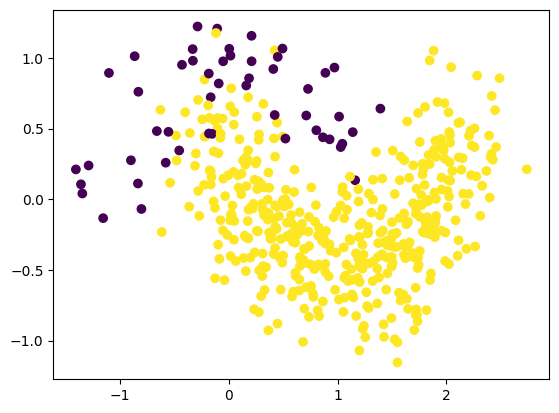

In [31]:
plt.scatter(x=[X[i][0] for i in range(len(X))], y=[X[j][1] for j in range(len(X))], c=Y)

## Training

We first try a spectral clustering model (unsupervised) since they are very good at fitting to spectral data that can be formulated as a graph partitioning problem. The 2-circles problem is a textbook case where spectral clustering is effective.

For the train test split, we just do the 70-30 split so we have enough testing data to evaluate properly but also enough to train on.

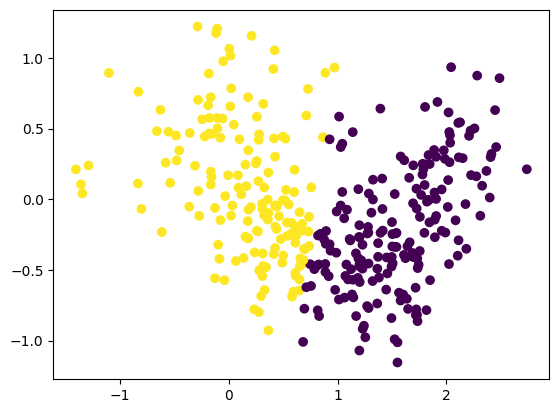

In [186]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

from sklearn.cluster import SpectralClustering

spec = SpectralClustering(n_clusters = 2, n_components = 2, affinity = 'rbf', gamma = 1.0)
spec.fit(X_train)
y_train_pred = spec.fit_predict(X_train)
plt.scatter(x=[X_train[i][0] for i in range(len(X_train))], y=[X_train[j][1] for j in range(len(X_train))], c=y_train_pred)

Maybe we can increase the gamma value to try again with an adjusted similarity metric:

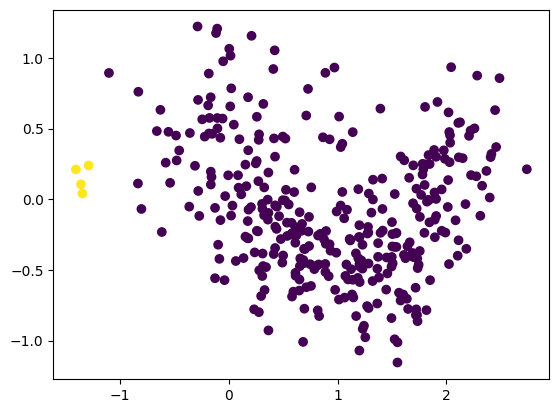

In [190]:
spec = SpectralClustering(n_clusters = 2, n_components = 2, affinity = 'rbf', gamma = 10.0)
spec.fit(X_train)
y_train_pred = spec.fit_predict(X_train)
plt.scatter(x=[X_train[i][0] for i in range(len(X_train))], y=[X_train[j][1] for j in range(len(X_train))], c=y_train_pred)

I also tried all gamma values in between (2-9) and the results jump between those of gamma = 1 and gamma = 10, with no in between. It looks like even though Spectral Clustering seemed promising, the huge amount of noise in the data messes up its ability to draw accurate clusters.Hierarchical Clustering should have similar results. Probably a supervised learning method (one that can go to a higher dimension) is needed here, since there are no clear clusters due to the noise, and also no clear decision boundaries on this dimension. Since we have a small dataset (50,450) and a binary classification problem, we will try SVMs.

We first try the default SVC (support vector machine) provided by sklearn, which has C = 1, a radial basis kernel, and no class weights.

In [179]:
from sklearn.svm import SVC

svm1 = SVC()
svm1.fit(X_train, y_train)

SVC()

## Testing / Optimization
We train the model and compute its train and test accuracies

Train Accuracy Model 1: 95.14285714285714
Test Accuracy Model 1: 97.33333333333334


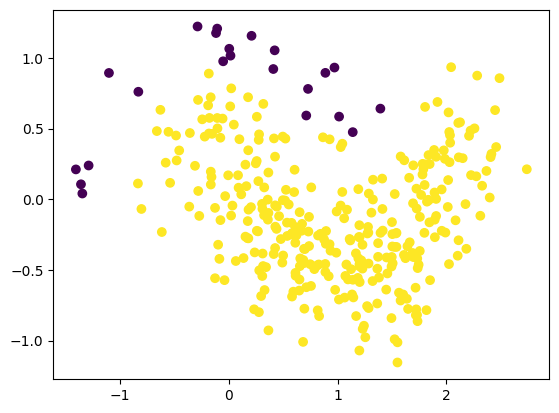

In [181]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_train_pred = svm1.predict(X_train)
y_test_pred = svm1.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)*100
test_accuracy = accuracy_score(y_test, y_test_pred)*100

print('Train Accuracy Model 1:', train_accuracy)
print('Test Accuracy Model 1:', test_accuracy)

plt.scatter(x=[X_train[i][0] for i in range(len(X_train))], y=[X_train[j][1] for j in range(len(X_train))], c=y_train_pred)

The train and test accuracies are both very high! The test accuracy is even higher than the train accuracy, indicating no overfitting. However, we notice a low amount of 0 (purple) classifications, and consider the specificity and sensitivity scores (we define sensitivity here as the true zero rate, or the probability of classifying 0 given a label of 0).

In [178]:
cmat = confusion_matrix(y_train, y_train_pred)
print('Sensitivity (P(0|True 0)):', str(100*cmat[0][0]/(cmat[0][0]+cmat[0][1])))
print('Specificity (P(1|True 1))', str(100*cmat[1][1]/(cmat[1][1] + cmat[1][0])))

Sensitivity (P(0|True 0)): 57.142857142857146
Specificity (P(1|True 1)) 99.36507936507937


Unfortunately the results for sensitivity score is extremely low, and our model is achieving high accuracy partly by just favoring the majority class (1). To correct for this, we will use class weights.

We also want to tune the other hyperparameters of the SVM, such as C (the regularization component) and gamma (steepness of dropoff of the similarity metric). We will do this, as well as find the correct class weight values, using cross-validation.

We will evaluate the hyperparameters of each model using the f1 score, so as to discourage extremely low specificity or sensitivity scores.

In [217]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score

svm2 = SVC(C = 1, gamma = 1, kernel = 'rbf', class_weight = {0:1, 1:1})

cs = [0.5, 1, 3, 5, 10, 100]
gammas = [0.1, 0.5, 1, 2, 4, 8, 15]
cws = [1/9, 1/6, 1/3, 1/2, 1]

bestscore = bestC = bestgamma = bestcw = -1

for c in cs:
    for g in gammas:
        for cw in cws:
            svm2 = SVC(C = c, gamma = g, kernel = 'rbf', class_weight = {0:1, 1:cw})
            scores = cross_val_score(svm2, X, Y, cv = 4, scoring = 'f1')
            avgscore = scores.mean()
            if avgscore > bestscore:
                bestscore = avgscore
                bestC = c
                bestgamma = g
                bestcw = cw

print(bestscore, bestC, bestgamma, bestcw)

0.9834007244063815 3 1 1


Train Accuracy Model 2: 96.85714285714285
Test Accuracy Model 2: 97.33333333333334


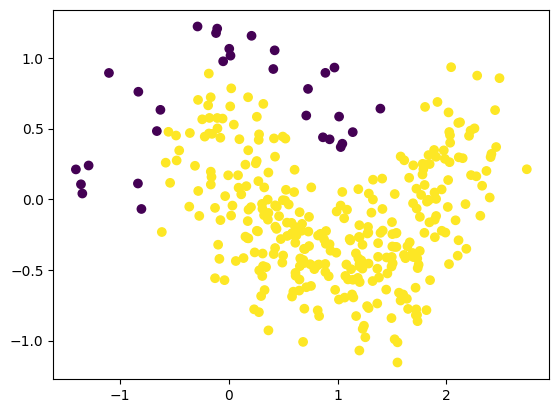

In [218]:
svm2 = SVC(C = bestC, gamma = bestgamma, kernel = 'rbf', class_weight = {0:1, 1:bestcw})
svm2.fit(X_train, y_train)
y_train_pred = svm2.predict(X_train)
y_test_pred = svm2.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)*100
test_accuracy = accuracy_score(y_test, y_test_pred)*100

print('Train Accuracy Model 2:', train_accuracy)
print('Test Accuracy Model 2:', test_accuracy)

plt.scatter(x=[X_train[i][0] for i in range(len(X_train))], y=[X_train[j][1] for j in range(len(X_train))], c=y_train_pred)

We see a very high accuracy score in both training and testing. Let's see if we improved on sensitivity:

In [219]:
cmat = confusion_matrix(y_train, y_train_pred)
print('Train Sensitivity (P(0|True 0)):', str(100*cmat[0][0]/(cmat[0][0]+cmat[0][1])))
print('Train Specificity (P(1|True 1))', str(100*cmat[1][1]/(cmat[1][1] + cmat[1][0])))
print('-------------------------------')
cmatt = confusion_matrix(y_test, y_test_pred)
print('Test Sensitivity (P(0|True 0)):', str(100*cmatt[0][0]/(cmatt[0][0]+cmatt[0][1])))
print('Test Specificity (P(1|True 1))', str(100*cmatt[1][1]/(cmatt[1][1] + cmatt[1][0])))


Train Sensitivity (P(0|True 0)): 77.14285714285714
Train Specificity (P(1|True 1)) 99.04761904761905
-------------------------------
Test Sensitivity (P(0|True 0)): 73.33333333333333
Test Specificity (P(1|True 1)) 100.0


Sensitivity score has also drastically increased. It looks like the cross validation was successful. Interestingly, it did not increase class balance by changing the class weights. If we had used 'balanced_accuracy' as the metric, the class weights would have changed to weight 0 class examples more heavily (I tried this but did not show, ratio would have been 9:1).

## Performance Analysis

Overall, the model performs very well and classifies almost every point correctly. The only ones it gets wrong are ambiguous anyways and could be classified into either class (part of both curves). The SVM understates the class proportion of class 0, however, if sensitivity is important this can be adjusted by changing the metric used on cross validation to balanced accuracy. Overall, it makes sense that SVM with radial-basis kernel worked well, because by visualizing the data, it was clear that going to a higher dimension was needed to disambiguate much of the data in the area where the curves intersect.